In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from tqdm import tqdm
import time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

import sys
#sys.path.append()
from KGB import preprocess_df, proceed_KGB


plt.rcParams["figure.figsize"] = (12, 9)
warnings.simplefilter("ignore")

In [2]:
current_dataset = 5
major_components = True
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
os.listdir(path)

['botnet-capture-20110815-fast-flux.pcap',
 'capture20110815-2.binetflow',
 'e4f816462c4fc84bb250e2b1d295bf23_85f9a5247afbe51e64794193f1dd72eb_unpacked.exe',
 'README']

In [3]:
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df = pd.read_csv(os.path.join(path,datafile_name))
df = preprocess_df(df)
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
35,2011-08-15 16:43:20.931208,1783.916870,tcp,147.32.84.59,64131,<?>,164.8.32.159,54992,PA_PA,0.0,0.0,293,32160,20485,flow=Background-Established-cmpgw-CVUT,True,False,False
36,2011-08-15 16:43:20.933428,0.444453,tcp,147.32.87.252,49218,<?>,147.32.80.13,3128,FPA_FPA,0.0,0.0,879,747909,19566,flow=To-Background-CVUT-Proxy,True,False,False
37,2011-08-15 16:43:20.933441,1804.837158,tcp,41.143.58.184,1328,<?>,147.32.86.179,58675,PA_PA,0.0,0.0,9547,942226,580940,flow=Background,True,False,False
38,2011-08-15 16:43:20.933541,0.187604,tcp,147.32.86.155,51273,<?>,204.154.94.81,80,FA_FA,0.0,0.0,3,198,132,flow=Background,True,False,False
39,2011-08-15 16:43:20.933942,1804.610718,tcp,147.32.86.179,58675,<?>,151.42.234.124,50001,PA_PA,0.0,0.0,29890,3689108,917036,flow=Background,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129827,2011-08-15 17:13:26.665269,0.020175,tcp,147.32.84.59,1121,->,147.32.80.13,80,SPA_SPA,0.0,0.0,5,1070,726,flow=To-Background-CVUT-Proxy,True,False,False
129828,2011-08-15 17:13:26.715751,0.000306,udp,147.32.86.20,63044,<->,147.32.80.9,53,CON,0.0,0.0,2,261,84,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
129829,2011-08-15 17:13:26.716285,0.076739,tcp,147.32.86.20,1311,->,188.138.84.239,80,SPA_SA,0.0,0.0,10,3639,429,flow=Background-TCP-Established,True,False,False
129830,2011-08-15 17:13:26.721279,0.000244,tcp,78.94.167.118,65017,->,147.32.84.118,6881,S_RA,0.0,0.0,2,134,74,flow=Background-TCP-Attempt,True,False,False


In [4]:
list_botnets = list(df[df.Label.str.contains("Botnet")].SrcAddr.unique())

In [5]:
proceed_KGB(df,anomaly_threshold =  2000, major_components = major_components ) 

147.32.84.118    3300.835505
147.32.84.138    4554.477266
147.32.84.165    2121.196811
147.32.84.59     6617.456062
147.32.85.25     2619.411449
147.32.85.7      3523.009677
147.32.85.76     2336.476633
147.32.86.20     3043.981635
dtype: float64

In [6]:
df[df.SrcAddr.isin(list_botnets)] # c'est l'attaquant

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
45650,2011-08-15 16:52:50.947767,0.000130,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V46-UDP-DNS,False,False,True
45754,2011-08-15 16:52:53.201828,0.000452,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V46-UDP-DNS,False,False,True
45755,2011-08-15 16:52:53.203182,0.037394,tcp,147.32.84.165,1027,->,74.125.232.195,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V46-TCP-HTTP-Google-Net-Estab...,False,False,True
48883,2011-08-15 16:53:42.316319,0.054648,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,226,71,flow=From-Botnet-V46-UDP-DNS,False,False,True
48892,2011-08-15 16:53:42.371928,1139.728638,tcp,147.32.84.165,1038,->,94.63.149.150,80,SPA_SPA,0.0,0.0,48,3584,1169,flow=From-Botnet-V46-TCP-WEB-Established,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127960,2011-08-15 17:12:52.581592,1.008225,tcp,147.32.84.165,2240,->,46.4.36.120,443,S_RA,0.0,0.0,6,366,186,flow=From-Botnet-V46-TCP-Attempt,False,False,True
128021,2011-08-15 17:12:53.673162,0.022795,tcp,147.32.84.165,2242,->,212.117.171.138,65500,SA_SA,0.0,0.0,3,184,122,flow=From-Botnet-V46-TCP-Not-Encrypted-SMTP-Pr...,False,False,True
128029,2011-08-15 17:12:53.817294,0.184262,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,294,72,flow=From-Botnet-V46-UDP-DNS,False,False,True
128037,2011-08-15 17:12:54.002371,31.425388,tcp,147.32.84.165,2243,->,64.12.175.136,587,SPA_FSPA,0.0,0.0,14,2752,195,flow=From-Botnet-V46-TCP-Established-SPAM,False,False,True


In [7]:
#"147.32.84.165"
end = pd.to_datetime("2011-08-16 12:10:15.643807")
cutted = df[df.StartTime<= end]
proceed_KGB(cutted,  anomaly_threshold = 1500, major_components = major_components ) 

147.32.84.118    3300.835505
147.32.84.138    4554.477266
147.32.84.165    2121.196811
147.32.84.170    1823.343062
147.32.84.229    1681.297442
147.32.84.59     6617.456062
147.32.85.25     2619.411449
147.32.85.7      3523.009677
147.32.85.76     2336.476633
147.32.86.20     3043.981635
dtype: float64

In [8]:
window = 5

In [9]:
window = 5

def compute_anomalies_scores_for_windows(df, window = window, step = 1) : 


    window_delta = pd.Timedelta(window, "m")
    min_time = df.StartTime.iloc[0]
    max_time = df.StartTime.iloc[-1]
    duration = max_time-min_time - window_delta
    number_of_iterations = int(duration.total_seconds() / (step*60))


    res = []
    for i in tqdm(range(number_of_iterations)) :
        time_of_end = min_time + window_delta + pd.Timedelta(step*i, "m")
        cutted = df[df.StartTime<= time_of_end ]
        res.append(proceed_KGB(cutted, window_time = window, major_components = major_components ) )
        
    new_res = [pd.DataFrame( {"anomaly_score" : df, "id_time_frame" : id_df}) for id_df, df in enumerate(res)]
    result = pd.concat(new_res)
    
    return result    

    
result = compute_anomalies_scores_for_windows(df, window = 5, step = 1)
result

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:59<00:00,  4.78s/it]


,anomaly_score,id_time_frame
0.0.0.0,0.0,0
00:15:17:2c:e5:2d,0.0,0
1.169.155.97,0.0,0
1.53.52.171,0.0,0
1.54.27.15,0.0,0
...,...,...
99.88.236.127,0.0,24
99.9.94.61,0.0,24
99.95.0.168,0.0,24
99.98.141.185,0.0,24


# Label

In [10]:

def label_data(df, list_botnets) :
    labels = []
    for index, row in tqdm(df.iterrows()) :
        labels.append(index in list_botnets)
    df["IP_src"] = df.index
    df["label"] = labels
    
    return df.sort_values("anomaly_score", ascending=False, inplace = False)
    
labelled_res =  label_data(result, list_botnets)
labelled_res

127419it [00:03, 35173.58it/s]


,anomaly_score,id_time_frame,IP_src,label
147.32.84.59,9649.430544,8,147.32.84.59,False
147.32.84.59,9597.773029,5,147.32.84.59,False
147.32.84.59,9452.690436,7,147.32.84.59,False
147.32.84.59,9247.938231,6,147.32.84.59,False
147.32.84.59,8937.783557,1,147.32.84.59,False
...,...,...,...,...
31.13.144.27,0.000000,7,31.13.144.27,False
31.129.193.112,0.000000,7,31.129.193.112,False
31.128.108.74,0.000000,7,31.128.108.74,False
27.4.82.7,0.000000,7,27.4.82.7,False


In [11]:
whitelist = ["147.32.84.59", "147.32.84.138"]
labelled_res[~labelled_res.IP_src.isin(whitelist)]

,anomaly_score,id_time_frame,IP_src,label
147.32.84.118,6497.023185,7,147.32.84.118,False
147.32.84.118,6436.118357,8,147.32.84.118,False
147.32.84.118,5989.899504,9,147.32.84.118,False
147.32.84.118,5968.283347,6,147.32.84.118,False
147.32.84.118,5901.657612,5,147.32.84.118,False
...,...,...,...,...
31.13.144.27,0.000000,7,31.13.144.27,False
31.129.193.112,0.000000,7,31.129.193.112,False
31.128.108.74,0.000000,7,31.128.108.74,False
27.4.82.7,0.000000,7,27.4.82.7,False


In [12]:
labelled_res[labelled_res.label==1].anomaly_score.describe()

count      20.000000
mean     2182.258450
std      1013.686554
min         6.932919
25%      1944.272529
50%      2390.097262
75%      2828.351105
max      3458.561258
Name: anomaly_score, dtype: float64

(1.3821470302366266, 4688.357937498594)

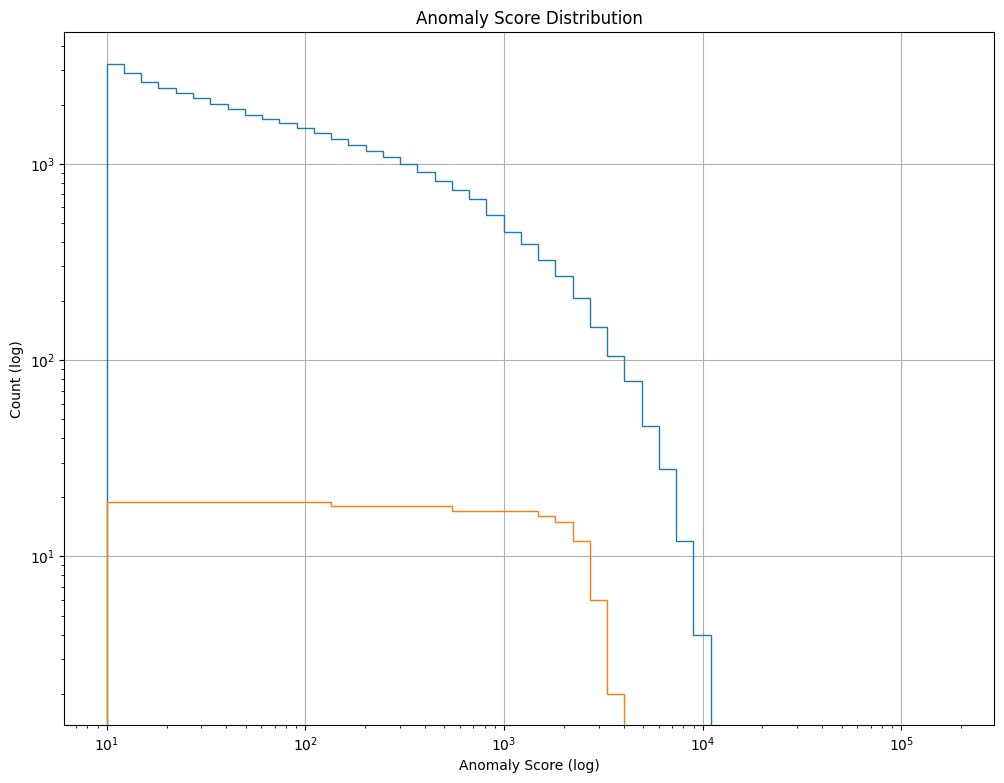

In [13]:
bins = 10*np.exp(np.arange(0,10,0.2))
f, ax = plt.subplots()
only_botnet = labelled_res[labelled_res.label==1]

labelled_res.hist(column = "anomaly_score",bins = bins, ax = ax,  histtype='step', cumulative=-1)
only_botnet.hist(column = "anomaly_score",bins = bins, ax = ax,  histtype='step', cumulative=-1)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel("Count (log)")
plt.xlabel("Anomaly Score (log)")
plt.title("Anomaly Score Distribution")
plt.ylim(bottom=0)

# Logistic Regression

In [14]:
X = labelled_res.anomaly_score.values.reshape(-1, 1)
Y = labelled_res.label

clf = LogisticRegression(class_weight="balanced")
clf.fit(X, Y)
clf.coef_, clf.intercept_

(array([[0.00701341]]), array([-2.29280554]))

In [15]:
clf = LogisticRegression(random_state=4242)
clf.fit(X, Y)
clf.coef_, clf.intercept_

(array([[0.00094321]]), array([-9.08833982]))

# Gradient descent

In [16]:
def compute_metrics(data,threshold, window = 5, consider_window_correc = False) :
    #don't know if we have to consider the entire df
    
    if consider_window_correc :
        alpha = 0.01
        correc_func = np.exp(-alpha * window)+1
    else :
        correc_func = 1
        
    
    tTP= []
    tTN = []
    tFP = []
    tFN = []
    
    for time_frame in data.id_time_frame.unique() :
        current_time_frame = data[data.id_time_frame==time_frame]
        ##counts_ip_src.set_index = current_time_frame.groupby("IP_src").agg({"label":"mean"})
        #print(current_time_frame.IP_src.value_counts())
        counts_ip_src = current_time_frame.set_index("IP_src") #already aggregated
        #print(counts_ip_src)
        count_unik_botnet = len(current_time_frame[current_time_frame.label==1])
        count_unik_not_botnet = len(current_time_frame[current_time_frame.label==0])
    
        c_TP = counts_ip_src[(counts_ip_src.label==1) & (counts_ip_src.anomaly_score>threshold)]
        c_TN = counts_ip_src[(counts_ip_src.label==0) & (counts_ip_src.anomaly_score<=threshold)]
        c_FP = counts_ip_src[(counts_ip_src.label==0) & (counts_ip_src.anomaly_score>threshold)]
        c_FN = counts_ip_src[(counts_ip_src.label==1) & (counts_ip_src.anomaly_score<=threshold)]
        """print(c_TP, 2*"\n")
        print(c_TN, 2*"\n")
        print(c_FP, 2*"\n")
        print(c_FN, 2*"\n")
        break"""
        if count_unik_botnet>0 : 
            
            cur_tTP = len(c_TP)*correc_func/count_unik_botnet
            cur_tFN = len(c_FN)*correc_func/count_unik_botnet
            tTP.append(cur_tTP)
            tFN.append(cur_tFN)

              
        if count_unik_not_botnet > 0 :
            cur_tTN = len(c_TN)/count_unik_not_botnet
            cur_tFP = len(c_FP)/count_unik_not_botnet
            tTN.append(cur_tTN)
            tFP.append(cur_tFP)
         
    
    tTP = np.mean(tTP)
    tTN = np.mean(tTN)
    tFP = np.mean(tFP)
    tFN = np.mean(tFN)
    
    
    
    TPR = tTP/(tTP+tFN)
    TNR = tTN/(tTN+tFP)
    FPR = tFP/(tTN+tFP)
    FNR = tFN/(tTP+tFN)
    Prec = tTP/(tTP+tFP)
    Acc = (tTP+tTN)/(tTP+tTN+tFP+tFN)
    ErrR = (tFN+tFP)/(tTP+tTN+tFP+tFN)
    FM1 = 2*(Prec*TPR)/(Prec+TPR)
    metrics = {"tTP":tTP,"tTN": tTN,"tFP":tFP,"tFN":tFN,"TPR" : TPR, "TNR":TNR,"FPR":FPR,"FNR":FNR, "Prec":Prec,
              "Acc":Acc, "ErrR":ErrR, "FM1":FM1}
    return metrics
    
    

metrics = compute_metrics(labelled_res,10,window = window )  
    
metrics  

{'tTP': 0.95,
 'tTN': 0.9749294359048964,
 'tFP': 0.025070564095103585,
 'tFN': 0.05,
 'TPR': 0.95,
 'TNR': 0.9749294359048964,
 'FPR': 0.025070564095103585,
 'FNR': 0.05,
 'Prec': 0.9742884617603345,
 'Acc': 0.9624647179524481,
 'ErrR': 0.03753528204755179,
 'FM1': 0.96199094581236}

100%|████████████████████████████████████████████████████████████████████████████████| 520/520 [00:46<00:00, 11.19it/s]


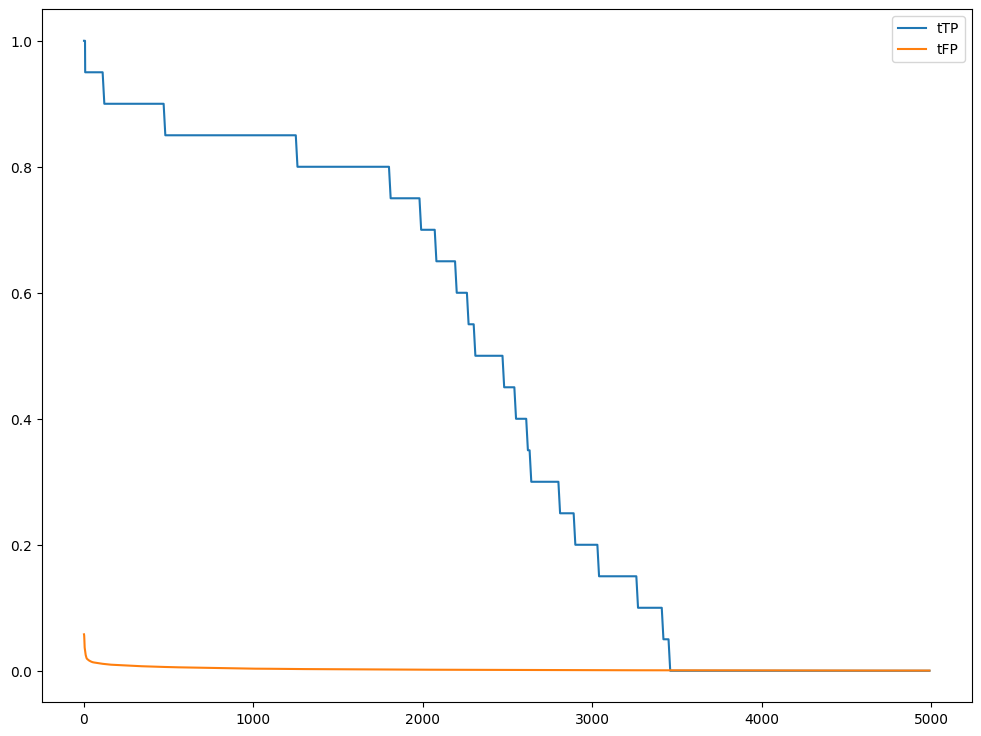

In [17]:
losses = []
list_metrics = []
thresholds = list(range(20)) +list(range(30,60,5)) +  list(range(60,5000,10))
for i in tqdm(thresholds):
    metrics = compute_metrics(labelled_res,i)   
    list_metrics.append(metrics)
    #losses.append(loss_perso(metrics) )

    
legend = ['tTP','tFP' ]
plt.plot(thresholds,[i[legend[0]] for i in list_metrics])
plt.plot(thresholds,[i[legend[1]] for i in list_metrics])
plt.legend(legend)

In [22]:

metrics_df = pd.DataFrame.from_records(list_metrics)
metrics_df.rename(columns = {"tTP":"TP", "tTN":"TN", "tFP":"FP", "tFN":"FN"}, inplace = True)
metrics_df["thresholds"] = thresholds
selected = metrics_df[metrics_df.FP<0.0103]
selected.sort_values(by = ["TP", "thresholds"], ascending = [False, True]).head(15)

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,Prec,Acc,ErrR,FM1,thresholds
34,0.9,0.989787,0.010213,0.1,0.9,0.989787,0.010213,0.1,0.988780,0.944894,0.055106,0.942303,140
35,0.9,0.990169,0.009831,0.1,0.9,0.990169,0.009831,0.1,0.989194,0.945084,0.054916,0.942492,150
36,0.9,0.990356,0.009644,0.1,0.9,0.990356,0.009644,0.1,0.989398,0.945178,0.054822,0.942584,160
37,0.9,0.990500,0.009500,0.1,0.9,0.990500,0.009500,0.1,0.989555,0.945250,0.054750,0.942655,170
38,0.9,0.990702,0.009298,0.1,0.9,0.990702,0.009298,0.1,0.989775,0.945351,0.054649,0.942755,180
39,0.9,0.990840,0.009160,0.1,0.9,0.990840,0.009160,0.1,0.989925,0.945420,0.054580,0.942823,190
40,0.9,0.990957,0.009043,0.1,0.9,0.990957,0.009043,0.1,0.990052,0.945478,0.054522,0.942881,200
41,0.9,0.991149,0.008851,0.1,0.9,0.991149,0.008851,0.1,0.990261,0.945575,0.054425,0.942976,210
42,0.9,0.991302,0.008698,0.1,0.9,0.991302,0.008698,0.1,0.990428,0.945651,0.054349,0.943051,220
43,0.9,0.991444,0.008556,0.1,0.9,0.991444,0.008556,0.1,0.990583,0.945722,0.054278,0.943121,230


In [23]:
selected.sort_values(by = ["TP", "thresholds"], ascending = [False, True]).head(8)[["TP","FP", "thresholds"]]

,TP,FP,thresholds
34,0.9,0.010213,140
35,0.9,0.009831,150
36,0.9,0.009644,160
37,0.9,0.009500,170
38,0.9,0.009298,180
39,0.9,0.009160,190
40,0.9,0.009043,200
41,0.9,0.008851,210


**Mettre la limite à 150 semble intéressant**

# Test

In [24]:
current_dataset = 6
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df_test = pd.read_csv(os.path.join(path,datafile_name))
df_test = preprocess_df(df_test)
list_botnets_test = list(df_test[df_test.Label.str.contains("Botnet")].SrcAddr.unique())


In [25]:
result = compute_anomalies_scores_for_windows(df_test, window = 5, step = 1)

100%|████████████████████████████████████████████████████████████████████████████████| 124/124 [08:08<00:00,  3.94s/it]


In [26]:
labelled_res_test =  label_data(result, list_botnets_test)

496770it [00:14, 34522.67it/s]


In [27]:
met_test = compute_metrics(labelled_res_test,150)  
met_test_2 = compute_metrics(labelled_res_test,200)  

**'tTP': 1.8536679532756786 , 'tFP': 0.012194027649070939**

In [28]:
metrics_df_test = pd.DataFrame.from_records([met_test,met_test_2])
metrics_df_test.rename(columns = {"tTP":"TP", "tTN":"TN", "tFP":"FP", "tFN":"FN"}, inplace = True)
metrics_df_test

,TP,TN,FP,FN,TPR,TNR,FPR,FNR,Prec,Acc,ErrR,FM1
0,0.983471,0.989145,0.010855,0.016529,0.983471,0.989145,0.010855,0.016529,0.989083,0.986308,0.013692,0.986269
1,0.983471,0.990678,0.009322,0.016529,0.983471,0.990678,0.009322,0.016529,0.990610,0.987074,0.012926,0.987028


# Test 2

In [29]:
current_dataset = 1
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df_test = pd.read_csv(os.path.join(path,datafile_name))
df_test = preprocess_df(df_test)

list_botnets_test = list(df_test[df_test.Label.str.contains("Botnet")].SrcAddr.unique())

result = compute_anomalies_scores_for_windows(df_test, window = 5, step = 1)

labelled_res_test =  label_data(result, list_botnets_test)

met_test = compute_metrics(labelled_res_test,150)  
met_test_2 = compute_metrics(labelled_res_test,200)  

metrics_df_test = pd.DataFrame.from_records([met_test,met_test_2])
metrics_df_test.rename(columns = {"tTP":"TP", "tTN":"TN", "tFP":"FP", "tFN":"FN"}, inplace = True)
metrics_df_test

100%|██████████████████████████████████████████████████████████████████████████████| 362/362 [1:21:40<00:00, 13.54s/it]
5327298it [02:31, 35092.51it/s]


,TP,TN,FP,FN,TPR,TNR,FPR,FNR,Prec,Acc,ErrR,FM1
0,0.99308,0.992816,0.007184,0.00692,0.99308,0.992816,0.007184,0.00692,0.992818,0.992948,0.007052,0.992949
1,0.99308,0.993428,0.006572,0.00692,0.99308,0.993428,0.006572,0.00692,0.993426,0.993254,0.006746,0.993253
